# 離散確率分布
*   ベルヌーイ分布
*   二項分布
*   カテゴリ分布
*   多項分布

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## 離散確率分布
### ベルヌーイ分布

コイン投げにおいて、表、もしくは裏が出る分布のように、試行の結果が2通りしか存在しない場合の分布を決定します。

確率質量関数 (Probability mass function)：

$
P\left( x \| \mu \right) = \mu^{x} \left(1-\mu \right)^{1-x}\quad \left(x \in \{ 0, 1 \} , 0 \leq \mu \leq 1 \right)
$

累積分布関数 (Cumulative distribution function)：

$
F\left( x \| \mu \right) = \sum_{x=0}^{\mu} \mu^{x}\left(1-\mu \right)^{1-x} \quad \left(x \in \{ 0, 1 \} \right) 
$

利用法
*   SciPy:	scipy.stats.bernoulli($\mu$)
*   NumPy:	np.random.choice([0, 1], p=[1-$\mu$, $\mu$])
*   Stan:	bernoulli($\mu$)

In [ ]:
from scipy.stats import bernoulli # ベルヌーイ分布

In [ ]:
# 以下のほかにも様々な関数が用意されています。
# - pmf : probability density function 確率質量関数 (logpmfもある)
# - cdf : cumulative distribution function 累積分布関数 (logcdfもある)
# - rvs: random variates その分布に従う確率変数（とりうる値）を、指定した数だけランダムに生成する

bernoulli?

In [ ]:
# マニュアルを見ながら理解すること
X = bernoulli(p=0.3) # 表(1)が出る確率
print (X.rvs(size=5)) # ランダムサンプリング

X = bernoulli(0.3)
print (X.rvs(5))

[0 0 0 0 0]
[0 0 0 0 0]


In [ ]:
# 確率質量関数 bernoulli.pmf(k, p, loc=0) を計算
# kには0か1の値(x)を、pには1の時の確率(mu)を指定する。
mu = 0.3

print(bernoulli.pmf(0, mu))
print(bernoulli.pmf(1, mu))
print(bernoulli.pmf((0,1), mu))

0.7000000000000001
0.3
[0.7 0.3]


[0.7 0.3]


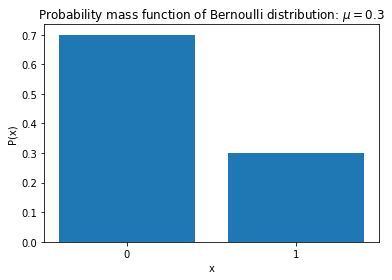

In [ ]:
# 確率質量関数 pmf(k, p, loc=0) の理論値の計算&グラフ表示
mu = 0.3

x_label = (0,1)
x = bernoulli.pmf(x_label, p=mu)
print (x)

# ヒストグラムで確認
# ベルヌーイ分布の定義域は 0,1 なのでそれ以外の区間では0になる。
plt.bar(x_label, x, label="$p$=" + str(mu)) # 観測データ：0の数=総数から1の数を引く、1の数
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xticks(x_label) # x軸目盛のラベルを置換
plt.title('Probability mass function of Bernoulli distribution: ' + '$\mu=' + str(mu) + '$')
plt.show()


In [ ]:
# ベルヌーイからのランダムサンプリングを試す
# bernoulli.rvs も利用できるが、使いやすさを優先し 同様の機能のある np.random.binomial(n=1, p=mu_truth, size=N)

x = []
for i in range(20):
  v = bernoulli.rvs(0.5)
  x.append(v)
  
print (x)
print (type(x)) # list 型

[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]
<class 'list'>


In [ ]:
# ベルヌーイからのランダムサンプリングを試す(2)
# 引数でで size を指定すれば for 文は不要。結果はは numpy.ndarray 型で保存されている
x = bernoulli.rvs(0.5, size=20)
  
print (x)
print (type(x))

[1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0]
<class 'numpy.ndarray'>


[1 1 0 0 1 0 1 0 1 0]


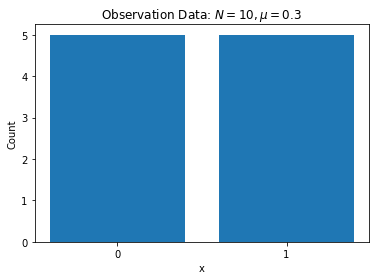

In [ ]:
# ランダムサンプリング&グラフ表示
mu = 0.3
size = 10 # サンプリング数が少ない場合に、正解とのずれに注意すること

x = bernoulli.rvs(p=mu, size=size)
print (x)

# ヒストグラムで確認
plt.bar([0,1], [size-np.sum(x), np.sum(x)], label="$p$=" + str(mu)) # 観測データ：0の数=総数から1の数を引く、1の数
plt.xlabel('x')
plt.ylabel('Count')
plt.xticks([0,1]) # x軸目盛のラベルを置換
plt.title('Observation Data: $N=' + str(size) + ', \mu=' + str(mu) + '$')
plt.show()


In [ ]:
# numpy にもランダムサンプリングをする関数は用意されており、サンプリングだけなら、numpy だけで事足りる
np.random?

# 抜粋
# - beta                 Beta distribution over ``[0, 1]``.
# - binomial             Binomial distribution.
# - gamma                Gamma distribution.
# - normal               Normal / Gaussian distribution.
# - poisson              Poisson distribution.
# - uniform              Uniform distribution.

In [ ]:
# 同様のランダムサンプリングは numpy.random をつかっても同様のことができる。
# binminal で二項分布に従う乱数を生成する
np.random.seed(0)# シード値を設定
x = np.random.binomial(n=1, p=0.5, size=20) # シード値を指定することで、ランダムサンプリングが再現できる

print (x)
print (type(x))

[1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1]
<class 'numpy.ndarray'>


[1 1 0 1 0 0 0 1 0 0]
0.4
[6, 4]


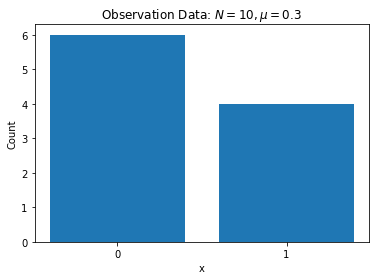

In [ ]:
mu = 0.3
size = 10

# 二項分布に従う乱数を整数n回数だけ、成功率pの試行を返す。sizeを指定すると結果を配列で返す
# random.binomial(n, p, size=None)
x = np.random.binomial(n=1, p=mu, size=size) # 
print (x)
print (np.sum(x) / size)
print ([size - np.sum(x), np.sum(x)]) # 1の数を数える

# ヒストグラムで確認
plt.bar(x=[0,1], height=[size - np.sum(x), np.sum(x)]) # 観測データ
plt.xlabel('x')
plt.ylabel('Count')
plt.xticks(ticks=[0,1]) # x軸目盛
plt.title('Observation Data: $N=' + str(size) + ', \mu=' + str(mu) + '$')
plt.show()

### 二項分布

コイン投げを複数回行った結果、表が出来る回数の確率が従う分布になります。回数が1の時はベルヌーイ分布に一致します。
- 𝑛 がコインを投げる回数
- 𝑝 が表が出る確率
- 𝑘 が表が出る回数で確率変数になります。

$ \displaystyle
P\left(k | n,p \right) = \frac{n!}{k!\left(n-k \right)!} p^{k}\left( 1-p\right)^{n-k}
$


利用法：
*   SciPy	scipy.stats.binom($n$, $p$)
*   NumPy	np.random.binomial($n$, $p$)
*   Stan	binomial($n$, $p$)

In [ ]:
from scipy.stats import binom # 二項分布

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


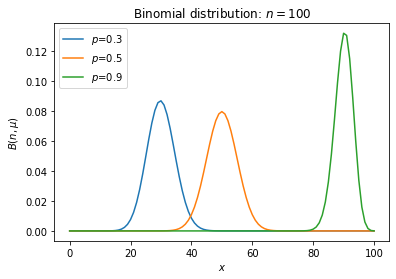

In [ ]:
# numpy.arange([start, ]stop, [step, ]dtype = None)
# 初項がstart(default=0)で、終点がendの公差がstep(default=1)の等差数列を作成
size = 100
x = np.arange(size+1) # 0から100までの等差数列を作る 
print (x)

p1 = 0.3
y1 = binom.pmf(x,size,p1)

p2 = 0.5
y2 = binom.pmf(x,size,p2)

p3 = 0.9
y3 = binom.pmf(x,size,p3)

# 図2.3の図と同じになるかを確認
plt.plot(x, y1, label="$p$=" + str(p1)) # $ と $で囲むとlatexの数式が使える
plt.plot(x, y2, label="$p$=" + str(p2))
plt.plot(x, y3, label="$p$=" + str(p3))
plt.xlabel('$x$')
plt.ylabel('$B(n,\mu)$')
plt.title("Binomial distribution: $n=$" + str(size))
plt.legend()
plt.show()

### (おまけ)

複数のパラメータを組み合わせて分布作りグラフを生成するヒント

10 0.5
10 0.2
20 0.6


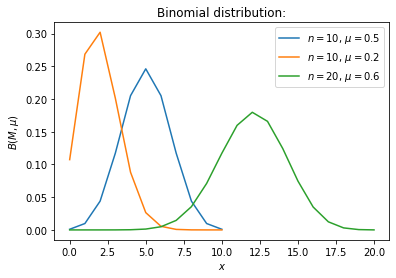

In [ ]:
size_list = [10, 10, 20]
mu_list = [0.5, 0.2, 0.6]
for _size, _mu in zip(size_list, mu_list): # 複数のリストをZIPでまとめて要素を取得
    print (_size, _mu) # 取得した要素の確認
    
    x = np.arange(_size+1)
    y = binom.pmf(x,_size,_mu) # 確率密度関数(pmf)を得る
    
    plt.plot(x, y, label="$n=$" + str(_size) + ", $\mu=$" + str(_mu)) # $ と $で囲むとlatexの数式が使える

plt.xlabel('$x$')
plt.ylabel('$B(M,\mu)$')
plt.title("Binomial distribution:")
plt.legend()
plt.show()

[27 33 29 31 21 31 31 31 37 32 28 29 32 23 32 32 26 25 28 28 31 29 41 24
 26 25 32 27 30 27 25 24 32 25 26 28 34 24 35 24 39 30 39 31 33 22 27 25
 27 25 28 29 23 32 31 27 30 24 31 37 28 32 25 33 27 26 31 21 34 19 32 27
 33 38 27 31 31 31 26 38 29 35 32 28 34 29 35 31 35 32 33 30 38 32 29 31
 21 28 32 27]


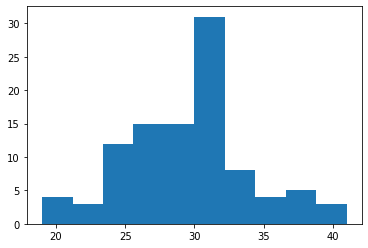

In [ ]:
# 指定された𝑛,pのパラメタを持つ二項分布からサンプリングを行い、確率質量関数が正しいことを確認します。

n = 100
p = 0.3

y = binom.rvs(n,p,size=100) # 総試行数(n)と確率(p)を指定した二項分布からsize分をサンプリング
print (y)

plt.hist(y, bins=10)
plt.show()

### カテゴリ分布

いびつないびつなK面体のサイコロ。ベルヌーイ分布の多変数化になります。ベルヌーイ分布がコインの裏表が出る確率分布を表現するのであれば、サイコロの面が出る確率分布を表現します。次に説明する多項分布の 𝑁=1 の場合に相当します。

$ \displaystyle
P\left(x_1, x_2, \cdots x_n | n,p_1,p_2 \cdots p_n \right) = p_1^{x_1}p_2^{x_2}\cdots p_n^{x_n}
$

ただし、$p_i$と$x_i$は $ \displaystyle \sum_i p_i = 1 , \sum_i x_i = 1 $を満たす。


利用法
*   SciPy:	scipy.stats.multinomial(1, $p$)
*   NumPy:	np.random.multinomial(1, $p$) or np.random.choice(len($p$), p=$p$)
*   Stan:	categorical($p$)

In [ ]:
from scipy.stats import multinomial

In [ ]:
multinomial?

In [ ]:
K = 6 # K は次元数. ここでは 6面サイコロを作成を作成
pi_truth = [1/K, 1/K, 1/K, 1/K, 1/K, 1/K] # 一様なな6面サイコロを設定。値を変えて、いびつなサイコロを作っても良い。
p = multinomial(1, pi_truth) # scipyではマルチヌーイ分布専用の関数なく、多項分布の𝑁=1の場合を利用します。

print(p.rvs(10)) # 10回ランダムサンプリング
print(p.pmf([1,0,0,0,0,0])) # 1つの目のみpmfを計算してみる

[[0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]]
0.16666666666666669


In [ ]:
x_onehot = np.identity(K) # identity はは KxKの正方行列を作成する関数. これを 1 of K 表現 (one-hot) ベクトルの作成関数として利用している。
print ("onehot", x_onehot) # 出力を確認
print(p.pmf(x_onehot)) # すべての目ののpmfを計算できる

true_model = p.pmf(x_onehot)

onehot [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


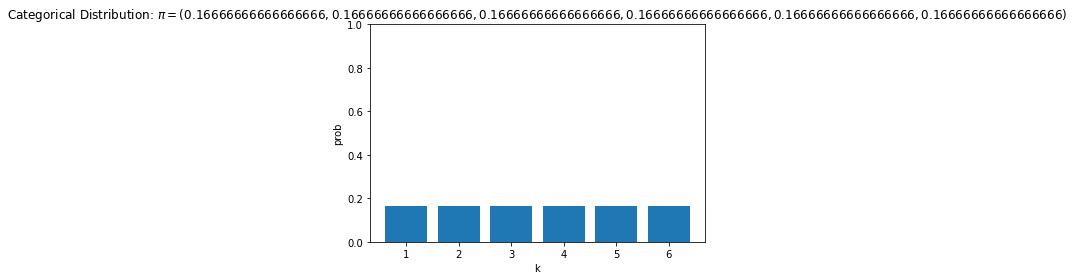

In [ ]:
# x軸の値を作成
x_label = np.arange(1, K + 1) # 1, 2, .., Kを作る

plt.bar(x=x_label, height=pi_truth) # 真のモデル
plt.xlabel('k')
plt.ylabel('prob')
plt.xticks(ticks=x_label, labels=x_label) # x軸目盛
plt.title('Categorical Distribution: $\pi=(' + ', '.join([str(k) for k in  pi_truth]) + ')$')
plt.ylim(0, 1)
plt.show()

In [ ]:
d = np.random.multinomial(n=1, pvals=np.array([1/3, 1/3, 1/3]), size=10)
print (d)

print(np.sum(d, axis=0))

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]]
[1 4 5]


In [ ]:
# カテゴリ分布の乱数はこのやりかただと、ラベルをふることができる
r = np.random.choice([1,2,3,4,5,6], p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], size = 10) 
print (r)

[4 6 4 2 6 3 1 2 2 6]


## 多項分布
二項分布の多変数版です。いかさまの可能性があるサイコロを複数回振って、それぞれの目が出る回数が従う確率分布になります。サイコロの面が 𝑛 個あり、それぞれが一回の試行で出る確率が 𝑝1,𝑝2,⋯,𝑝𝑛 で、 𝑁 回そのサイコロを振ったとき、それぞれの面が出る確率を 𝑥1,𝑥2,⋯,𝑥𝑛 とします。

$ \displaystyle
P\left(x_1, x_2, \cdots x_n | n,p_1,p_2 \cdots p_n \right) = \frac{N!}{x_1!x_2! \cdots x_n!} p_1^{x_1}p_2^{x_2}\cdots p_n^{x_n}
$

ただし、$p_i$と$x_i$は $ \displaystyle \sum_i p_i = 1 , \sum_i x_i = N $を満たす


NumPy	np.random.multivariate_normal(mu, Sigma)
SciPy	scipy.stats.multivariate_normal(mu, Sigma)
Stan	multi_normal(mu, Sigma)

In [ ]:
# 6面体のサイコロで、1から6それぞれの目が出る確率は、$0.1,0.2,0.25,0.15,0.2,01$とします。
# そのサイコロを10回振って、それぞれの目が1回,2回,1回,3回,2回,1回出る確率を計算します。

p = multinomial(10,[0.1,0.2,0.25,0.15,0.2,0.1])
print('確率 : ',str(p.pmf([1,2,1,3,2,1]))[:8])

確率 :  0.002041


In [ ]:
# 上記のサイコロを10回投げて、それぞれの目が出る回数をサンプリングします。とりあえず一回だけサンプリングしてみます。

multinomial.rvs(10, [0.1,0.2,0.25,0.15,0.2,0.1], size=1)

array([[0, 1, 4, 2, 3, 0]])